# Boston price prediction


In [1]:
import pandas as pd
import numpy as np

In [12]:
prices = pd.read_csv("/content/drive/MyDrive/Boston.csv")

In [14]:
prices.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
from sklearn.model_selection import train_test_split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a5e039c50>,
      dtype=object)

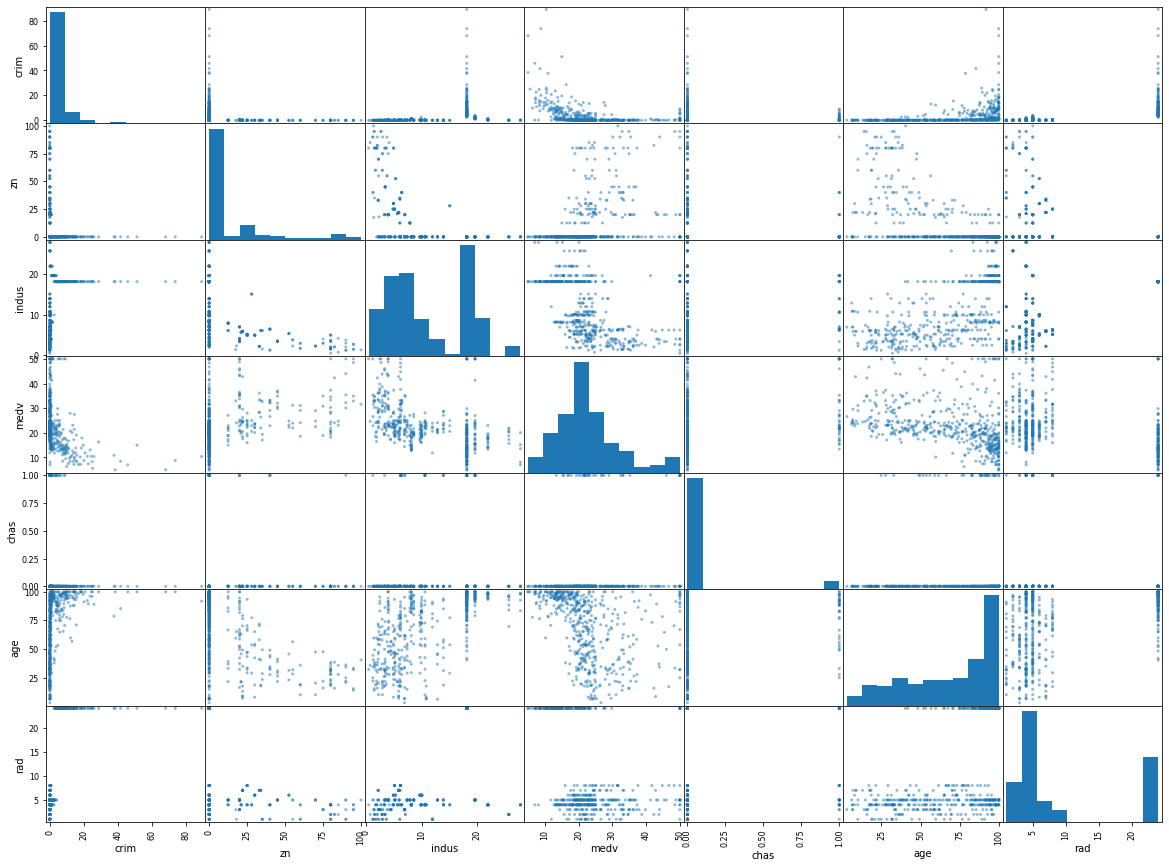

In [49]:
from pandas.plotting import scatter_matrix
list = ["crim","zn","indus","medv","chas","age","rad"]
scatter_matrix(prices[list],figsize=(20,15))

In [24]:
X = prices.drop("medv",axis=1)
X
y=prices['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy="median")


In [27]:
from sklearn.preprocessing import StandardScaler

In [30]:
data_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])

In [31]:
modified = data_pipeline.fit(X_train , Y_train)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor()

In [34]:
model.fit(X_train , Y_train)

DecisionTreeRegressor()

In [35]:
from sklearn.metrics import mean_squared_error
predict = model.predict(X_test)

In [36]:
error = mean_squared_error(Y_test , predict)

In [37]:
np.sqrt(error)

4.814846321331474

In [38]:
##cross verification##
from sklearn.model_selection import cross_val_score

In [39]:
cross = cross_val_score(model , X_train , Y_train , cv = 10)

In [40]:
cross

array([0.7848937 , 0.77810481, 0.80764244, 0.17634777, 0.50613011,
       0.85119825, 0.81423473, 0.59291056, 0.84964245, 0.58448625])

In [44]:
print(cross.std())
print(cross.mean())

0.20330615367147892
0.674559107621546


In [45]:
## 0.67 +/- 0.2033 ##